# Heart Rate Data

In [12]:
import pandas as pd
import glob
import json
from collections.abc import MutableMapping

# Enter path and file information
path = r'C:\Users\benni\Downloads\BennieRegenold\user-site-export'
file_pattern = 'heart_rate-2018-05*.json'

# Loop through files and add them to an output list
num_files = 3
cnt = 1

data=[]

for filename in glob.iglob(path+'\\'+file_pattern):
    if cnt > num_files:
        break
    else:
        with open(filename, 'r') as read_file:
            data.extend(json.load(read_file))
        cnt += 1
    
    
len(data)

29263

In [13]:
# Function to flatten an import dictionary of dictionaries
    # https://www.geeksforgeeks.org/python-convert-nested-dictionary-into-flattened-dictionary/
def convert_flatten(d, parent_key ='', sep ='_'): 
    items = [] 
    for k, v in d.items(): 
        new_key = parent_key + sep + k if parent_key else k 
  
        if isinstance(v, MutableMapping): 
            items.extend(convert_flatten(v, new_key, sep = sep).items()) 
        else: 
            items.append((new_key, v)) 
    return dict(items)

# Apply flatten function to json input
data_flat = [convert_flatten(data[i]) for i in range(0,len(data))]

data_flat[:5]


[{'dateTime': '05/01/18 05:00:01', 'value_bpm': 57, 'value_confidence': 3},
 {'dateTime': '05/01/18 05:00:06', 'value_bpm': 59, 'value_confidence': 3},
 {'dateTime': '05/01/18 05:00:16', 'value_bpm': 58, 'value_confidence': 3},
 {'dateTime': '05/01/18 05:00:21', 'value_bpm': 55, 'value_confidence': 3},
 {'dateTime': '05/01/18 05:00:26', 'value_bpm': 56, 'value_confidence': 3}]

In [14]:
# Put data into a dataFrame
df = pd.DataFrame(data_flat)

# Make dateTime the index
df.set_index(pd.to_datetime(df['dateTime']),inplace=True)

#Remove unnecssary columns
df.drop(['dateTime','value_confidence'],axis=1, inplace=True)

df.head()

,value_bpm
dateTime,
2018-05-01 05:00:01,57
2018-05-01 05:00:06,59
2018-05-01 05:00:16,58
2018-05-01 05:00:21,55
2018-05-01 05:00:26,56


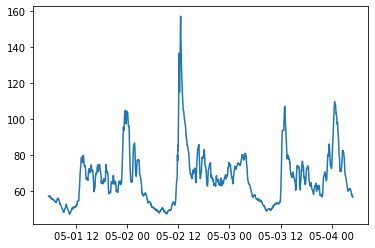

In [15]:
# Plot the rolling average data
import matplotlib.pyplot as plt
%matplotlib inline

# Measurements taken ~4x/sec or ~240x/min
win=240

plt.plot(df.rolling(window=win).mean())